In [91]:
import pandas as pd

historical_transactions = pd.read_csv("../data/Historical-transaction-data.csv")
historical_transactions["transaction_date"] = pd.to_datetime(historical_transactions["transaction_date"])
historical_transactions.sort_values(by='transaction_date', inplace=True)

In [92]:
historical_transactions.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
299047,TWISTEE APPLE 1L,2021-10-15 00:00:00+00:00,1080472.0,BXZ4,SHOP116,270,2
307603,ORANGE CRUSH 1.5L,2021-10-15 00:00:00+00:00,7019101.0,2DR6,SHOP072,440,3
218920,ORANGE BARLEY 1.5L,2021-10-15 00:00:00+00:00,2139003.0,2P0S,SHOP117,220,2
382413,SODA 500ML,2021-10-15 00:00:00+00:00,1046693.0,FJ4O,SHOP104,140,3
79474,ORANGE BARLEY 1.5L,2021-10-15 00:00:00+00:00,2830354.0,8X8D,SHOP013,220,1


In [93]:
historical_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473974 entries, 299047 to 234742
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   item_description  438046 non-null  object             
 1   transaction_date  473974 non-null  datetime64[ns, UTC]
 2   invoice_id        467654 non-null  float64            
 3   customer_id       473974 non-null  object             
 4   shop_id           473974 non-null  object             
 5   item_price        473974 non-null  int64              
 6   quantity_sold     473974 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 28.9+ MB


In [94]:
historical_transactions.describe()

,invoice_id,item_price,quantity_sold
count,4.676540e+05,473974.000000,473974.000000
mean,1.996684e+06,206.689734,1.925506
std,1.344594e+06,166.764732,1.634535
min,1.700000e+01,35.000000,-1.000000
25%,1.032114e+06,100.000000,1.000000
50%,2.032996e+06,200.000000,2.000000
75%,3.032568e+06,220.000000,2.000000
max,8.331754e+06,17400.000000,101.000000


In [95]:
for col in historical_transactions.columns:
    print(col, "=> Unique values:", len(historical_transactions[col].unique()))
    print(col, "=> Null values:", len(historical_transactions[historical_transactions[col].isnull()]))
    print("")

item_description => Unique values: 38
item_description => Null values: 35928

transaction_date => Unique values: 62
transaction_date => Null values: 0

invoice_id => Unique values: 343343
invoice_id => Null values: 6320

customer_id => Unique values: 191636
customer_id => Null values: 0

shop_id => Unique values: 124
shop_id => Null values: 0

item_price => Unique values: 209
item_price => Null values: 0

quantity_sold => Unique values: 69
quantity_sold => Null values: 0



In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

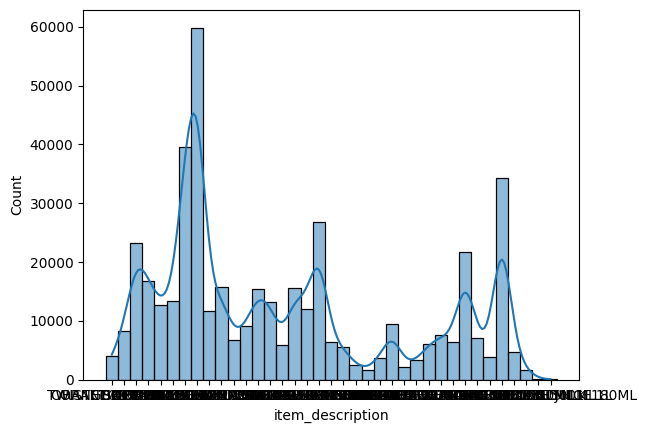

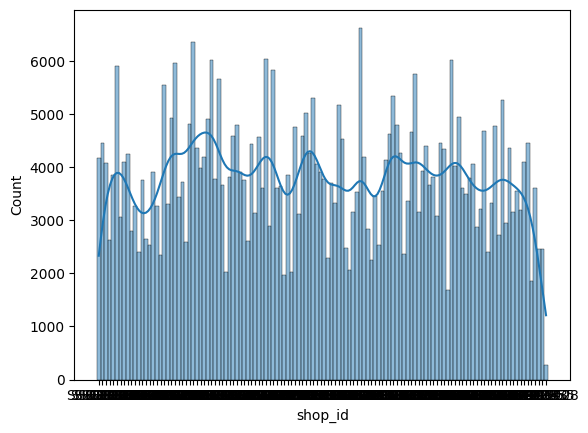

In [97]:
sns.histplot(data=historical_transactions, x='item_description', kde=True)
plt.show()
sns.histplot(data=historical_transactions, x='shop_id', kde=True)
plt.show()

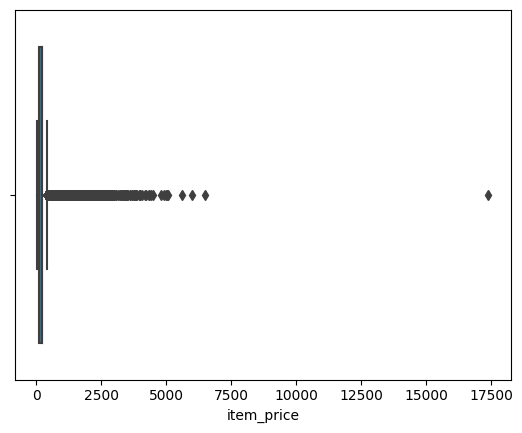

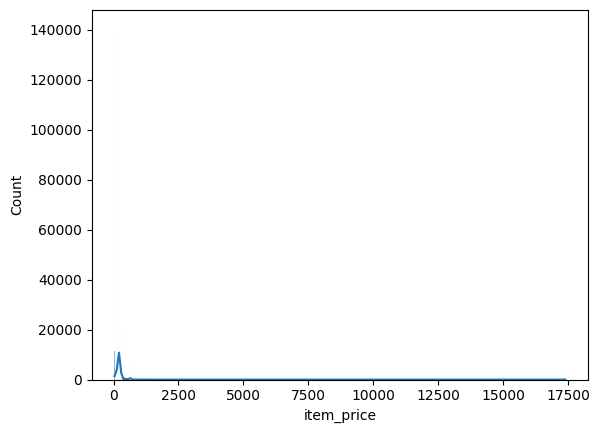

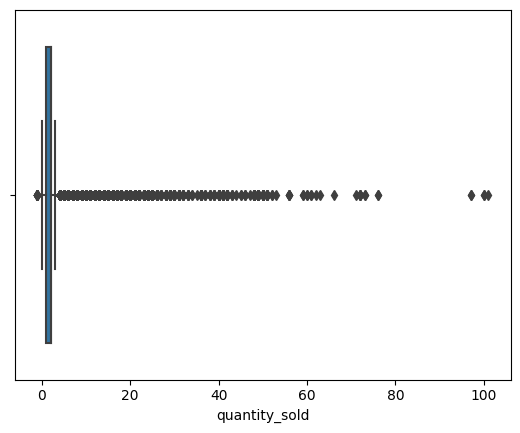

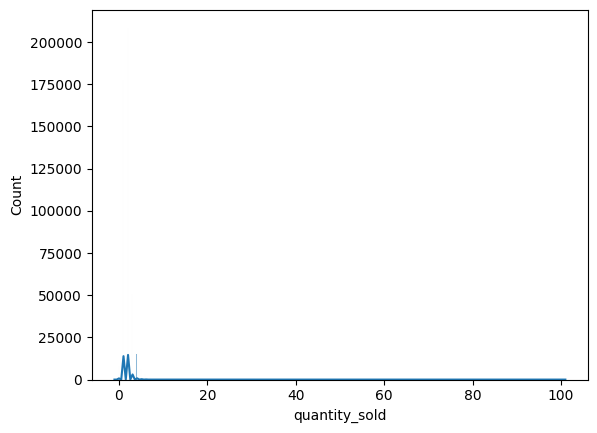

In [98]:
sns.boxplot(data=historical_transactions, x='item_price')
plt.show()
sns.histplot(data=historical_transactions, x='item_price', kde=True)
plt.show()
sns.boxplot(data=historical_transactions, x='quantity_sold')
plt.show()
sns.histplot(data=historical_transactions, x='quantity_sold', kde=True)
plt.show()

# Without null values

In [99]:
non_null = historical_transactions.dropna()
print("Removed lines:", len(historical_transactions) - len(non_null))

Removed lines: 41865


# Some outlier filtering

Removed lines: 14284


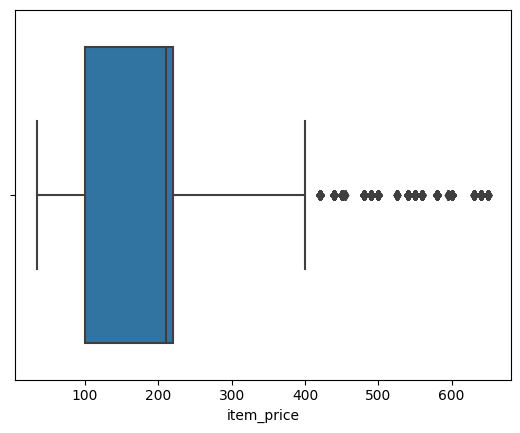

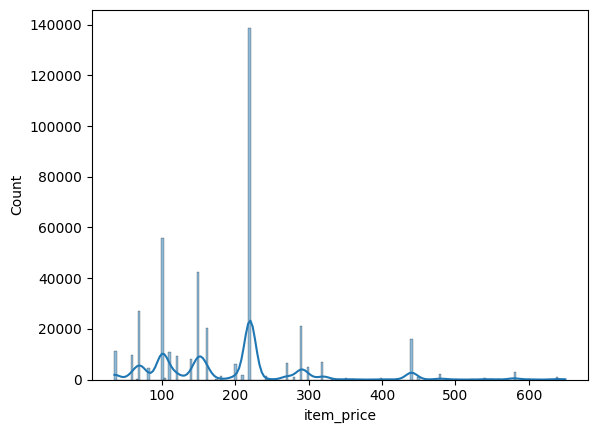

In [100]:
# item_price
low_limit = 0
upper_limit = non_null["item_price"].quantile(0.98) # 700
non_outlier_price = non_null[(non_null["item_price"] > low_limit) & (non_null["item_price"] < upper_limit)]
print("Removed lines:", len(non_null) - len(non_outlier_price))
sns.boxplot(data=non_outlier_price, x='item_price')
plt.show()
sns.histplot(data=non_outlier_price, x='item_price', kde=True)
plt.show()

Removed lines: 8415


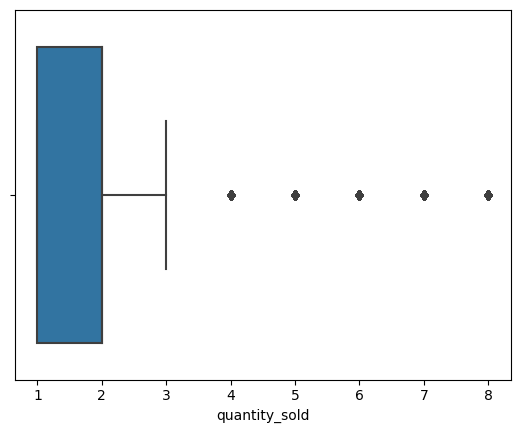

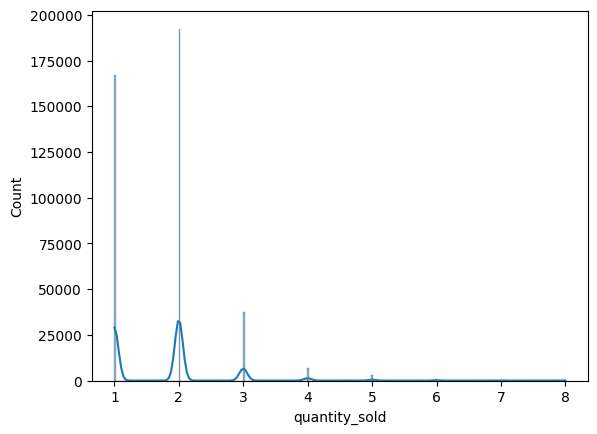

In [101]:
# quantity_sold
low_limit = 0
upper_limit = non_outlier_price["quantity_sold"].quantile(0.999) # 10
non_outlier_quantity = non_outlier_price[(non_outlier_price["quantity_sold"] > low_limit) & (non_outlier_price["quantity_sold"] < upper_limit)]
print("Removed lines:", len(non_outlier_price) - len(non_outlier_quantity))
sns.boxplot(data=non_outlier_quantity, x='quantity_sold')
plt.show()
sns.histplot(data=non_outlier_quantity, x='quantity_sold', kde=True)
plt.show()

In [103]:
new_historical_transactions = non_outlier_quantity
print(new_historical_transactions.info())
print(new_historical_transactions.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 409410 entries, 299047 to 234742
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   item_description  409410 non-null  object             
 1   transaction_date  409410 non-null  datetime64[ns, UTC]
 2   invoice_id        409410 non-null  float64            
 3   customer_id       409410 non-null  object             
 4   shop_id           409410 non-null  object             
 5   item_price        409410 non-null  int64              
 6   quantity_sold     409410 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 25.0+ MB
None
         invoice_id     item_price  quantity_sold
count  4.094100e+05  409410.000000  409410.000000
mean   2.000923e+06     190.044173       1.760516
std    1.344488e+06     102.158777       0.819901
min    1.700000e+01      35.000000       1.000000
25%    1